In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv")

In [3]:
data.head(5)

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [5]:
data.shape

(803, 11)

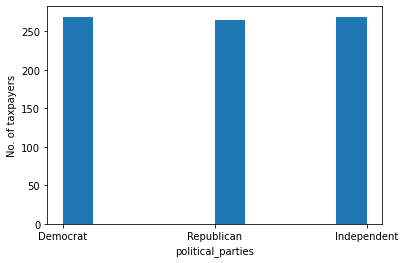

In [6]:
plt.hist(data['PoliticalParty'])
plt.xlabel('political_parties')
plt.ylabel('No. of taxpayers')
plt.show()

In [7]:
data['PoliticalParty'].value_counts()

Independent    269
Democrat       269
Republican     265
Name: PoliticalParty, dtype: int64

In [8]:
data['Filed in 2015'].value_counts()

1    415
0    388
Name: Filed in 2015, dtype: int64

In [9]:
data['Filed in 2016'].value_counts()

1    409
0    394
Name: Filed in 2016, dtype: int64

In [10]:
data['Filed in 2017'].value_counts()

1    407
0    396
Name: Filed in 2017, dtype: int64

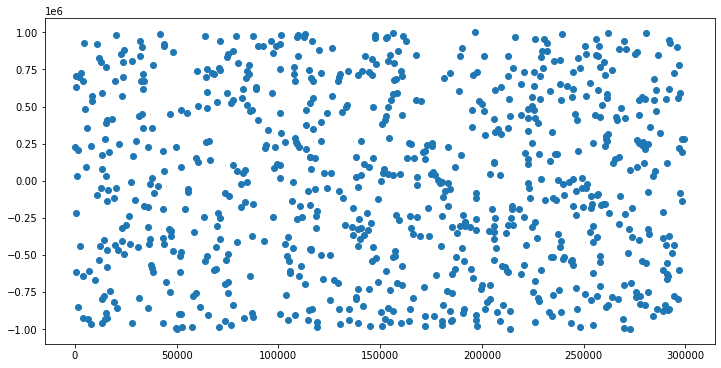

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(data['HHI'], data['HHDL'])

In [12]:
X = data.drop('PoliticalParty', axis = 1)
y = data['PoliticalParty']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)


In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(642, 10)
(161, 10)
(642,)
(161,)


In [15]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred = LogReg.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [52]:
acc

0.35403726708074534